# 10. Datasets and DataLoaders: Working with Real Data 📊

Welcome to the **essential world of data loading**! 🚀

So far, we've worked with toy datasets that fit in memory. But real-world ML involves massive datasets that require efficient loading, preprocessing, and batching. This is where PyTorch's **Dataset** and **DataLoader** shine!

## 🎯 Learning Objectives

By the end of this notebook, you'll master:

- **Understanding PyTorch's data pipeline** architecture
- **Built-in datasets** from torchvision, torchtext, and more
- **Creating custom Dataset classes** for your own data
- **DataLoader** for efficient batching and shuffling
- **Data transformations** and augmentation
- **Handling different data types**: images, text, CSV, custom formats
- **Advanced techniques**: weighted sampling, custom collate functions
- **Best practices** for production data pipelines

## 🧩 What You'll Build

- **Custom image dataset** from folder structure
- **CSV/Tabular data loader** for structured data
- **Augmented dataset** with transformations
- **Text dataset** for NLP tasks
- **Multi-modal dataset** combining different data types
- **Production-ready data pipeline** with all bells and whistles

## 🌍 Real-World Data Loading

| Data Type       | Challenge            | Solution                        |
| --------------- | -------------------- | ------------------------------- |
| **Images**      | Too large for memory | Load on-the-fly with transforms |
| **Text**        | Variable lengths     | Custom collate function         |
| **CSV/Tabular** | Mixed data types     | Pandas + custom Dataset         |
| **Video**       | Massive files        | Frame sampling + lazy loading   |
| **Audio**       | High sampling rates  | Chunking + preprocessing        |

Let's master efficient data loading! 🏗️


## 📦 Setup and Imports

Let's import everything we need for data loading!


In [1]:
# Essential imports
import torch
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from torch.utils.data import WeightedRandomSampler, SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F

# For datasets
from torchvision import datasets, transforms
from torchvision.transforms import functional as TF

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from pathlib import Path
from typing import Tuple, List, Dict, Any
import warnings

warnings.filterwarnings("ignore")

# Set random seeds
torch.manual_seed(42)
np.random.seed(42)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Using device: {device}")

# Plotting setup
plt.style.use("default")
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 11
sns.set_palette("husl")

print("✅ All imports successful!")
print("🎯 Ready to master data loading!")

🔥 Using device: cpu
✅ All imports successful!
🎯 Ready to master data loading!


## 🧩 Understanding PyTorch's Data Pipeline

Before diving in, let's understand the architecture!

### The Data Pipeline Flow:

```
Raw Data → Dataset → DataLoader → Model → Training
   ↓          ↓          ↓
 Storage   Indexing   Batching
   📁         🔢         📦
```

### Key Components:

#### 1. **Dataset** (torch.utils.data.Dataset)

- **Purpose**: Represents your data source
- **Must implement**:
  - `__len__()`: Return the number of samples
  - `__getitem__(idx)`: Return one sample (data, label) pair
- **Think of it as**: A Python list with superpowers

#### 2. **DataLoader** (torch.utils.data.DataLoader)

- **Purpose**: Batches, shuffles, and loads data efficiently
- **Features**:
  - Automatic batching
  - Shuffling for training
  - Multi-process loading
  - Custom collate functions
- **Think of it as**: A smart iterator over your dataset

### Why This Architecture?

| Approach                 | Loading | Memory       | Flexibility |
| ------------------------ | ------- | ------------ | ----------- |
| **Load all at once**     | ❌ Slow | ❌ High      | ❌ Limited  |
| **Dataset + DataLoader** | ✅ Fast | ✅ Efficient | ✅ Flexible |

### The Magic:

```python
# Instead of:
for data, labels in entire_dataset:  # Loads everything!
    train(data, labels)

# We do:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
for batch_data, batch_labels in dataloader:  # Loads 32 at a time!
    train(batch_data, batch_labels)
```


## 🎨 Built-in Datasets: Quick Start

PyTorch provides many built-in datasets. Let's explore them!


In [2]:
# Load MNIST dataset (handwritten digits)
print("📥 Loading MNIST dataset...")

# Define transforms (preprocessing)
transform = transforms.Compose(
    [
        transforms.ToTensor(),  # Convert PIL Image to tensor
        transforms.Normalize((0.1307,), (0.3081,)),  # Normalize with MNIST mean and std
    ]
)

# Download and load training data
train_dataset = datasets.MNIST(
    root="../01_basics/data",  # Where to save/load
    train=True,  # Training set
    download=True,  # Download if not present
    transform=transform,  # Apply transformations
)

# Load test data
test_dataset = datasets.MNIST(
    root="../01_basics/data", train=False, download=True, transform=transform
)

print("✅ MNIST loaded successfully!")
print(f"   Training samples: {len(train_dataset):,}")
print(f"   Test samples: {len(test_dataset):,}")
print(f"   Image shape: {train_dataset[0][0].shape}")
print(f"   Number of classes: {len(train_dataset.classes)}")
print(f"   Classes: {train_dataset.classes}")

📥 Loading MNIST dataset...
✅ MNIST loaded successfully!
   Training samples: 60,000
   Test samples: 10,000
   Image shape: torch.Size([1, 28, 28])
   Number of classes: 10
   Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']



🔍 Exploring MNIST Dataset:

Single sample:
  Image type: <class 'torch.Tensor'>
  Image shape: torch.Size([1, 28, 28]) (channels, height, width)
  Image dtype: torch.float32
  Label: 5 (class 5)
  Image value range: [-0.424, 2.821]


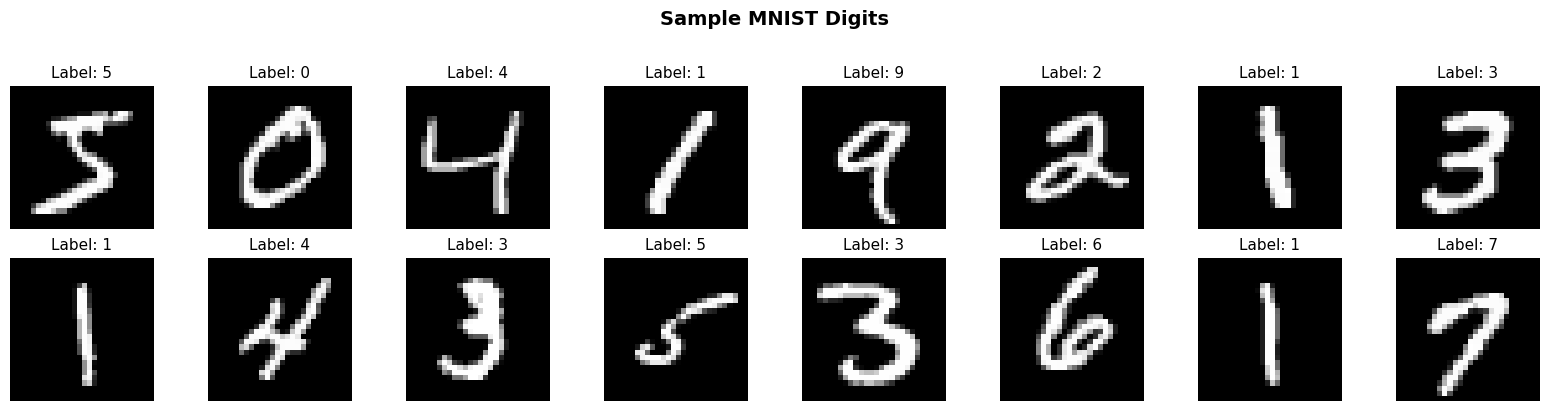


✅ Dataset exploration complete!


In [ ]:
# Explore the dataset
print("\n🔍 Exploring MNIST Dataset:\n")

# Access a single sample
image, label = train_dataset[0]
print("Single sample:")
print(f"  Image type: {type(image)}")
print(f"  Image shape: {image.shape} (channels, height, width)")
print(f"  Image dtype: {image.dtype}")
print(f"  Label: {label} (class {label})")
print(f"  Image value range: [{image.min():.3f}, {image.max():.3f}]")

# Visualize samples
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
axes = axes.flatten()

for idx in range(16):
    image, label = train_dataset[idx]

    # Convert tensor to numpy and squeeze channel dimension
    img_np = image.squeeze().numpy()

    axes[idx].imshow(img_np, cmap="gray")
    axes[idx].set_title(f"Label: {label}", fontsize=11)
    axes[idx].axis("off")

plt.suptitle("Sample MNIST Digits", fontsize=14, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

print("\n✅ Dataset exploration complete!")

## 🔄 DataLoader: Efficient Batching

Now let's use DataLoader to create efficient batches!


In [ ]:
# Create DataLoaders
print("🔄 Creating DataLoaders...\n")

# Training DataLoader with shuffling
train_loader = DataLoader(
    train_dataset,
    batch_size=64,  # 64 images per batch
    shuffle=True,  # Shuffle for training
    num_workers=0,  # Number of subprocesses (0 = main process)
    pin_memory=True if torch.cuda.is_available() else False,  # Faster GPU transfer
)

# Test DataLoader without shuffling
test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,  # No need to shuffle test data
    num_workers=0,
    pin_memory=True if torch.cuda.is_available() else False,
)

print("✅ DataLoaders created!")
print("\nTraining Loader:")
print(f"  Batch size: {train_loader.batch_size}")
print(f"  Number of batches: {len(train_loader)}")
print(f"  Total samples: {len(train_loader.dataset):,}")

print("\nTest Loader:")
print(f"  Batch size: {test_loader.batch_size}")
print(f"  Number of batches: {len(test_loader)}")
print(f"  Total samples: {len(test_loader.dataset):,}")

🔄 Creating DataLoaders...

✅ DataLoaders created!

Training Loader:
  Batch size: 64
  Number of batches: 938
  Total samples: 60,000
  Shuffle: False

Test Loader:
  Batch size: 64
  Number of batches: 157
  Total samples: 10,000



🔍 Iterating through DataLoader:

Batch information:
  Images shape: torch.Size([64, 1, 28, 28]) (batch, channels, height, width)
  Labels shape: torch.Size([64])
  Images dtype: torch.float32
  Labels dtype: torch.int64
  First 10 labels: [1, 2, 8, 5, 2, 6, 9, 9, 9, 4]


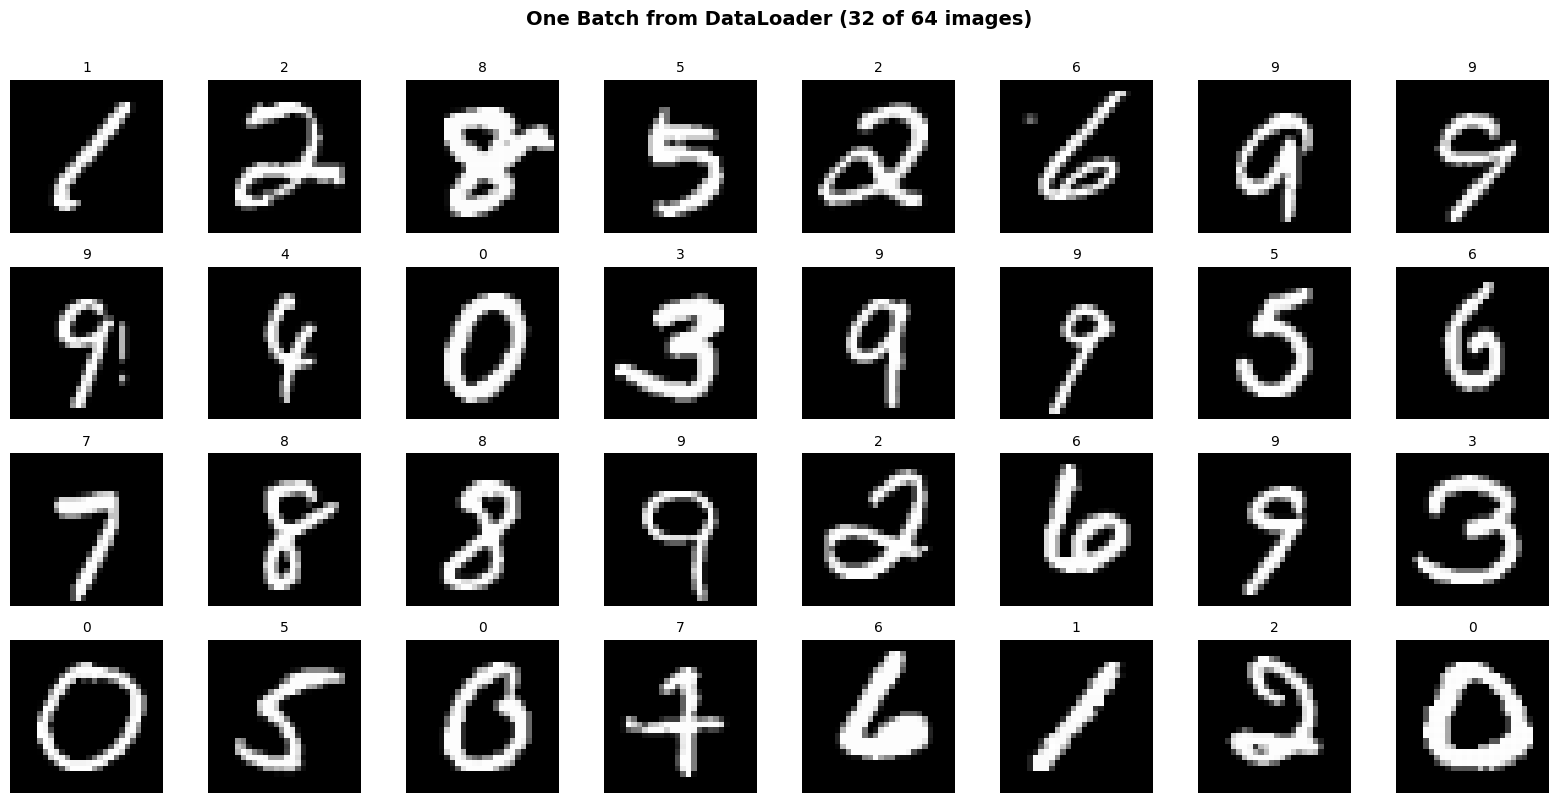


✅ This is how data flows through your training loop!


In [ ]:
# Iterate through DataLoader
print("\n🔍 Iterating through DataLoader:\n")

# Get one batch
batch_images, batch_labels = next(iter(train_loader))

print("Batch information:")
print(f"  Images shape: {batch_images.shape} (batch, channels, height, width)")
print(f"  Labels shape: {batch_labels.shape}")
print(f"  Images dtype: {batch_images.dtype}")
print(f"  Labels dtype: {batch_labels.dtype}")
print(f"  First 10 labels: {batch_labels[:10].tolist()}")

# Visualize one batch
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
axes = axes.flatten()

for idx in range(32):
    img = batch_images[idx].squeeze().numpy()
    label = batch_labels[idx].item()

    axes[idx].imshow(img, cmap="gray")
    axes[idx].set_title(f"{label}", fontsize=10)
    axes[idx].axis("off")

plt.suptitle(
    "One Batch from DataLoader (32 of 64 images)", fontsize=14, fontweight="bold", y=1.0
)
plt.tight_layout()
plt.show()

print("\n✅ This is how data flows through your training loop!")

## 🛠️ Creating Custom Datasets

The real power comes from creating your own Dataset classes! Let's start with a simple example.

### Dataset Template:

```python
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        """Initialize with your data"""
        self.data = data
        self.labels = labels

    def __len__(self):
        """Return the number of samples"""
        return len(self.data)

    def __getitem__(self, idx):
        """Return one sample (data, label) pair"""
        return self.data[idx], self.labels[idx]
```

### The Three Required Methods:

1. **`__init__`**: Setup (load file paths, precompute things, etc.)
2. **`__len__`**: Return total number of samples
3. **`__getitem__`**: Return a single sample by index


### Example 1: Simple Numpy Dataset


In [ ]:
class NumpyDataset(Dataset):
    """Custom Dataset for numpy arrays"""

    def __init__(self, data, labels, transform=None):
        """
        Args:
            data: numpy array of features
            labels: numpy array of labels
            transform: optional transform to apply
        """
        self.data = torch.FloatTensor(data)
        self.labels = torch.LongTensor(labels)
        self.transform = transform

    def __len__(self):
        """Return the total number of samples"""
        return len(self.data)

    def __getitem__(self, idx):
        """Get a single sample"""
        sample = self.data[idx]
        label = self.labels[idx]

        if self.transform:
            sample = self.transform(sample)

        return sample, label


# Create synthetic data
print("🔨 Creating custom dataset from numpy arrays...\n")

np.random.seed(42)
n_samples = 1000
n_features = 20

# Generate random data
X = np.random.randn(n_samples, n_features)
y = (X.sum(axis=1) > 0).astype(int)  # Binary classification

# Create custom dataset
custom_dataset = NumpyDataset(X, y)

print("✅ Custom dataset created!")
print(f"   Total samples: {len(custom_dataset)}")
print(f"   Features per sample: {custom_dataset.data.shape[1]}")

# Test the dataset
sample, label = custom_dataset[0]
print("\n🔍 First sample:")
print(f"   Feature shape: {sample.shape}")
print(f"   Label: {label.item()}")
print(f"   Feature values: {sample[:5].numpy()}...")

# Create DataLoader
custom_loader = DataLoader(custom_dataset, batch_size=32, shuffle=True, num_workers=4)

# Get one batch
batch_X, batch_y = next(iter(custom_loader))
print("\n📦 Batch from DataLoader:")
print(f"   Batch features shape: {batch_X.shape}")
print(f"   Batch labels shape: {batch_y.shape}")
print(f"   Labels in batch: {batch_y.tolist()}")

🔨 Creating custom dataset from numpy arrays...

✅ Custom dataset created!
   Total samples: 1000
   Features per sample: 20

🔍 First sample:
   Feature shape: torch.Size([20])
   Label: 0
   Feature values: [ 0.49671414 -0.1382643   0.64768857  1.5230298  -0.23415338]...

📦 Batch from DataLoader:
   Batch features shape: torch.Size([32, 20])
   Batch labels shape: torch.Size([32])
   Labels in batch: [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]


### Example 2: CSV/Tabular Dataset

Let's work with CSV data - very common in real-world projects!


In [ ]:
class CSVDataset(Dataset):
    """Custom Dataset for CSV/Tabular data"""

    def __init__(self, csv_file, feature_cols, label_col, transform=None):
        """
        Args:
            csv_file: path to CSV file
            feature_cols: list of column names for features
            label_col: column name for label
            transform: optional transform
        """
        self.data_frame = pd.read_csv(csv_file)
        self.feature_cols = feature_cols
        self.label_col = label_col
        self.transform = transform

        # Extract features and labels
        self.features = self.data_frame[feature_cols].values
        self.labels = self.data_frame[label_col].values

        print("📊 Loaded CSV dataset:")
        print(f"   Shape: {self.features.shape}")
        print(f"   Features: {feature_cols}")
        print(f"   Label: {label_col}")

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        # Get features and label
        features = torch.FloatTensor(self.features[idx])
        label = torch.FloatTensor([self.labels[idx]])

        if self.transform:
            features = self.transform(features)

        return features, label


# Create a sample CSV dataset
print("📝 Creating sample CSV data...\n")

# Create synthetic student exam data
data = {
    "study_hours": np.random.uniform(0, 10, 500),
    "attendance": np.random.uniform(50, 100, 500),
    "previous_score": np.random.uniform(40, 100, 500),
}
data["final_score"] = (
    data["study_hours"] * 5
    + data["attendance"] * 0.3
    + data["previous_score"] * 0.4
    + np.random.normal(0, 5, 500)
)

df = pd.DataFrame(data)
csv_path = "../01_basics/student_data_custom.csv"
df.to_csv(csv_path, index=False)

print(f"✅ CSV file created: {csv_path}")
print(f"\n{df.head()}")

# Create dataset from CSV
feature_columns = ["study_hours", "attendance", "previous_score"]
label_column = "final_score"

csv_dataset = CSVDataset(csv_path, feature_columns, label_column)

print("\n✅ CSV Dataset ready!")
print(f"   Samples: {len(csv_dataset)}")

# Test the dataset
features, label = csv_dataset[0]
print(f"\n🔍 First sample:")
print(f"   Features: {features}")
print(f"   Label: {label.item():.2f}")

📝 Creating sample CSV data...

✅ CSV file created: ../01_basics/student_data_custom.csv

   study_hours  attendance  previous_score  final_score
0     0.556664   86.430784       50.794852    49.625806
1     9.857676   59.448760       65.491723    90.549620
2     8.000185   88.470270       85.271303   106.593522
3     8.688091   67.378256       90.413979   108.131585
4     6.942943   76.526845       98.754106   103.490355
📊 Loaded CSV dataset:
   Shape: (500, 3)
   Features: ['study_hours', 'attendance', 'previous_score']
   Label: final_score

✅ CSV Dataset ready!
   Samples: 500

🔍 First sample:
   Features: tensor([ 0.5567, 86.4308, 50.7949])
   Label: 49.63


### Example 3: Image Dataset from Folder

Most real-world image datasets are organized in folders. Let's create a dataset for that!


In [ ]:
class ImageFolderDataset(Dataset):
    """
    Custom Dataset for images organized in folders

    Expected structure:
        root/
            class1/
                img1.jpg
                img2.jpg
            class2/
                img1.jpg
                img2.jpg
    """

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir: root directory with class folders
            transform: optional transform to apply to images
        """
        self.root_dir = Path(root_dir)
        self.transform = transform

        # Get all image paths and labels
        self.image_paths = []
        self.labels = []
        self.class_names = []

        # Iterate through class folders
        for class_idx, class_dir in enumerate(sorted(self.root_dir.iterdir())):
            if class_dir.is_dir():
                self.class_names.append(class_dir.name)

                # Get all images in this class folder
                for img_path in class_dir.glob("*"):
                    if img_path.suffix.lower() in [".jpg", ".jpeg", ".png", ".bmp"]:
                        self.image_paths.append(img_path)
                        self.labels.append(class_idx)

        print("📁 Loaded Image Folder Dataset:")
        print(f"   Root: {root_dir}")
        print(f"   Classes: {self.class_names}")
        print(f"   Total images: {len(self.image_paths)}")
        for idx, class_name in enumerate(self.class_names):
            count = self.labels.count(idx)
            print(f"     - {class_name}: {count} images")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        # Apply transforms
        if self.transform:
            image = self.transform(image)

        return image, label


# Example usage (conceptual - you'd need actual image folders)
print("💡 Image Folder Dataset Example:")
print(
    """
To use this dataset, organize your images like:

my_dataset/
    ├── cats/
    │   ├── cat1.jpg
    │   ├── cat2.jpg
    │   └── ...
    └── dogs/
        ├── dog1.jpg
        ├── dog2.jpg
        └── ...

Then:
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])
    
    dataset = ImageFolderDataset('my_dataset/', transform=transform)
    loader = DataLoader(dataset, batch_size=32, shuffle=True)
"""
)

💡 Image Folder Dataset Example:

To use this dataset, organize your images like:

my_dataset/
    ├── cats/
    │   ├── cat1.jpg
    │   ├── cat2.jpg
    │   └── ...
    └── dogs/
        ├── dog1.jpg
        ├── dog2.jpg
        └── ...

Then:
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])

    dataset = ImageFolderDataset('my_dataset/', transform=transform)
    loader = DataLoader(dataset, batch_size=32, shuffle=True)



## 🎨 Data Transformations and Augmentation

Transforms modify your data on-the-fly - essential for preprocessing and augmentation!


🎨 Image Transformation Examples:



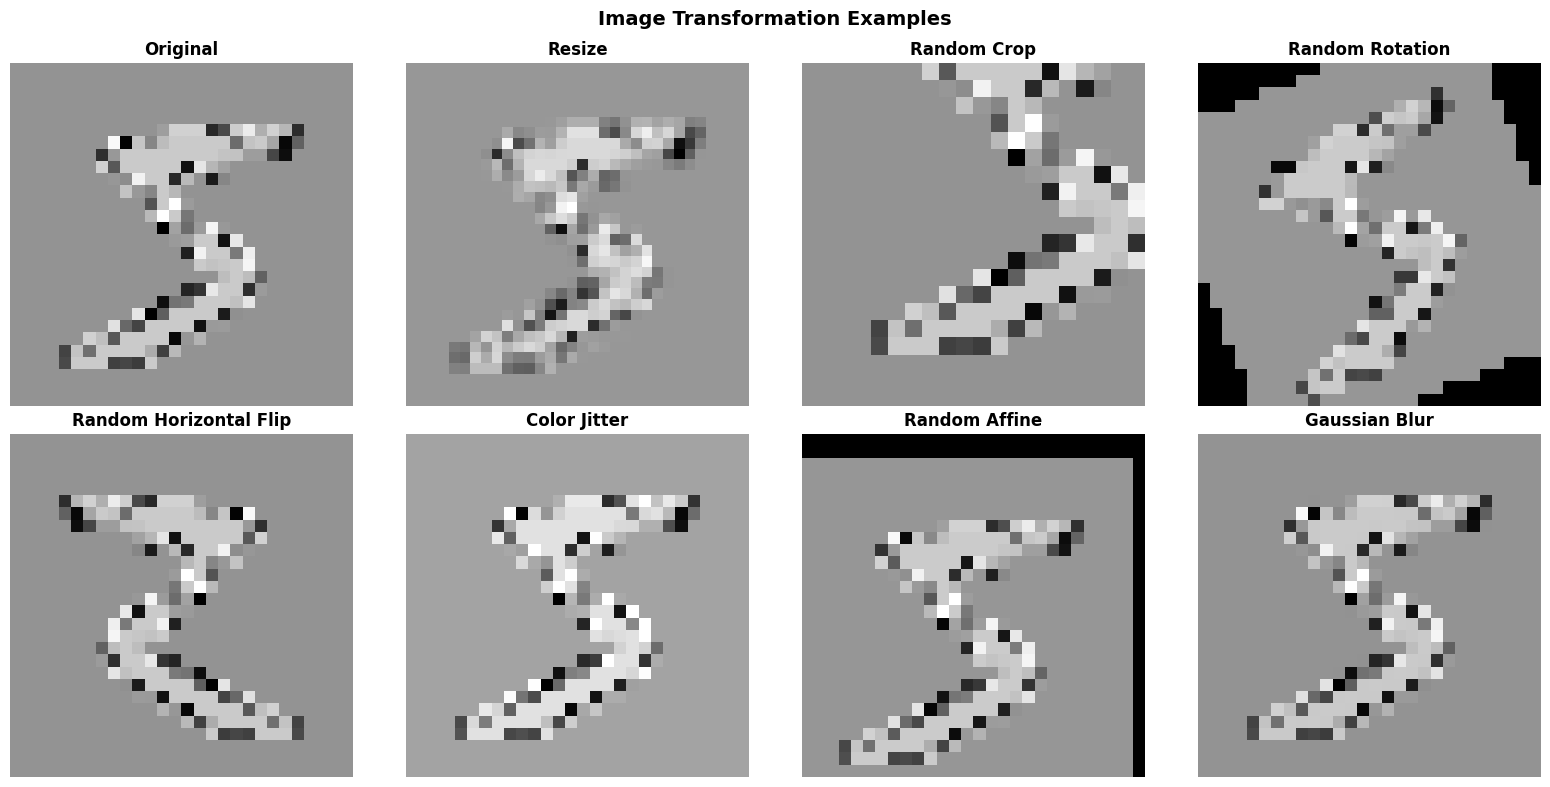

✅ Transforms modify images on-the-fly during loading!


In [13]:
# Common image transforms
print("🎨 Image Transformation Examples:\n")

# Get a sample image from MNIST
sample_img, _ = train_dataset[0]
sample_img_pil = transforms.ToPILImage()(sample_img)

# Define various transforms
transform_examples = {
    "Original": transforms.Compose([]),
    "Resize": transforms.Compose([transforms.Resize((32, 32))]),
    "Random Crop": transforms.Compose([transforms.RandomCrop(20)]),
    "Random Rotation": transforms.Compose([transforms.RandomRotation(45)]),
    "Random Horizontal Flip": transforms.Compose(
        [transforms.RandomHorizontalFlip(p=1.0)]
    ),
    "Color Jitter": transforms.Compose(
        [transforms.ColorJitter(brightness=0.5, contrast=0.5)]
    ),
    "Random Affine": transforms.Compose(
        [transforms.RandomAffine(degrees=15, translate=(0.1, 0.1))]
    ),
    "Gaussian Blur": transforms.Compose([transforms.GaussianBlur(kernel_size=5)]),
}

# Visualize transforms
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, (name, transform) in enumerate(transform_examples.items()):
    if name == "Original":
        transformed = sample_img_pil
    else:
        transformed = transform(sample_img_pil)

    axes[idx].imshow(transformed, cmap="gray")
    axes[idx].set_title(name, fontsize=12, fontweight="bold")
    axes[idx].axis("off")

plt.suptitle("Image Transformation Examples", fontsize=14, fontweight="bold", y=0.98)
plt.tight_layout()
plt.show()

print("✅ Transforms modify images on-the-fly during loading!")

### Creating a Data Augmentation Pipeline

For training, we want aggressive augmentation. For validation/test, just normalization!


✅ Created datasets with different transforms:
   Training: With augmentation
   Test: Clean (no augmentation)


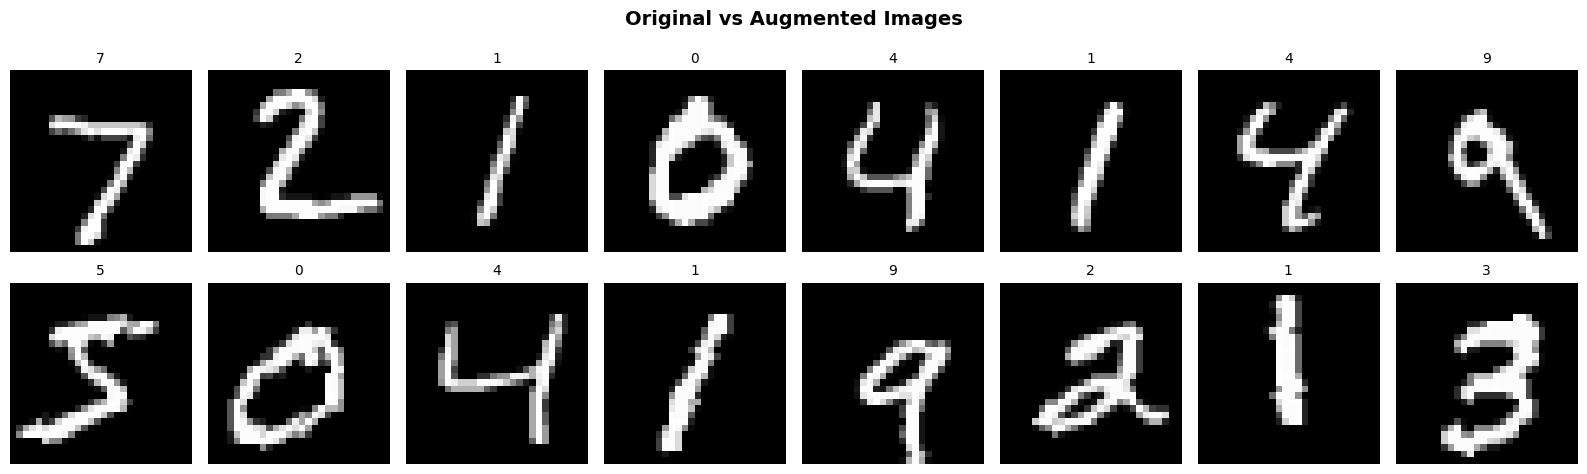


🎯 Augmentation creates variations → Better generalization!


In [ ]:
# Training transform with augmentation
train_transform = transforms.Compose(
    [
        transforms.RandomRotation(10),  # Rotate ±10 degrees
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Shift
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize((0.1307,), (0.3081,)),  # Normalize
    ]
)

# Test transform without augmentation
test_transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

# Create datasets with different transforms
train_augmented = datasets.MNIST(
    root="../01_basics/data",
    train=True,
    download=True,
    transform=train_transform,  # With augmentation
)

test_clean = datasets.MNIST(
    root="../01_basics/data",
    train=False,
    download=True,
    transform=test_transform,  # No augmentation
)

print("✅ Created datasets with different transforms:")
print("   Training: With augmentation")
print("   Test: Clean (no augmentation)")

# Compare original vs augmented
fig, axes = plt.subplots(2, 8, figsize=(16, 5))

# Original images
for i in range(8):
    img, label = test_clean[i]
    axes[0, i].imshow(img.squeeze(), cmap="gray")
    axes[0, i].set_title(f"{label}", fontsize=10)
    axes[0, i].axis("off")

# Augmented versions of same images
for i in range(8):
    img, label = train_augmented[i]
    axes[1, i].imshow(img.squeeze(), cmap="gray")
    axes[1, i].set_title(f"{label}", fontsize=10)
    axes[1, i].axis("off")

axes[0, 0].set_ylabel("Original", fontsize=12, fontweight="bold")
axes[1, 0].set_ylabel("Augmented", fontsize=12, fontweight="bold")

plt.suptitle("Original vs Augmented Images", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

print("\n🎯 Augmentation creates variations → Better generalization!")

## ⚡ Advanced DataLoader Techniques

Let's explore advanced features for production-ready data loading!


### 1. Train/Validation/Test Split

Properly splitting your data is crucial!


In [ ]:
# Split dataset into train/val/test
print("📊 Splitting dataset...")

# Get full training dataset
full_dataset = datasets.MNIST(
    root="../01_basics/data", train=True, download=True, transform=transform
)

# Define split sizes
train_size = int(0.7 * len(full_dataset))  # 70% train
val_size = int(0.15 * len(full_dataset))  # 15% validation
test_size = len(full_dataset) - train_size - val_size  # 15% test

# Split the dataset
train_dataset_split, val_dataset, test_dataset_split = random_split(
    full_dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42),  # For reproducibility
)

print("✅ Dataset split complete:")
print(
    f"   Training: {len(train_dataset_split):,} samples ({train_size/len(full_dataset)*100:.1f}%)"
)
print(
    f"   Validation: {len(val_dataset):,} samples ({val_size/len(full_dataset)*100:.1f}%)"
)
print(
    f"   Test: {len(test_dataset_split):,} samples ({test_size/len(full_dataset)*100:.1f}%)"
)

# Create DataLoaders for each split
train_loader_split = DataLoader(train_dataset_split, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader_split = DataLoader(test_dataset_split, batch_size=64, shuffle=False)

print("\n📦 DataLoaders created:")
print(f"   Train batches: {len(train_loader_split)}")
print(f"   Val batches: {len(val_loader)}")
print(f"   Test batches: {len(test_loader_split)}")

📊 Splitting dataset...
✅ Dataset split complete:
   Training: 42,000 samples (70.0%)
   Validation: 9,000 samples (15.0%)
   Test: 9,000 samples (15.0%)

📦 DataLoaders created:
   Train batches: 657
   Val batches: 141
   Test batches: 141


### 2. Handling Class Imbalance with Weighted Sampling

When you have imbalanced classes, use weighted sampling to balance batches!


In [ ]:
# Create imbalanced dataset example
print("⚖️ Handling Class Imbalance:\n")

# Simulate imbalanced data (90% class 0, 10% class 1)
np.random.seed(42)
n_samples = 1000
class_0_samples = 900
class_1_samples = 100

X_imbalanced = np.random.randn(n_samples, 10)
y_imbalanced = np.array([0] * class_0_samples + [1] * class_1_samples)

# Shuffle
indices = np.random.permutation(n_samples)
X_imbalanced = X_imbalanced[indices]
y_imbalanced = y_imbalanced[indices]

print("Imbalanced dataset:")
unique, counts = np.unique(y_imbalanced, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples ({count/len(y_imbalanced)*100:.1f}%)")

# Create dataset
imbalanced_dataset = NumpyDataset(X_imbalanced, y_imbalanced)

# Calculate class weights
class_counts = torch.tensor([class_0_samples, class_1_samples])
class_weights = 1.0 / class_counts.float()
sample_weights = class_weights[y_imbalanced]

print(f"\n📊 Class weights: {class_weights.tolist()}")

# Create weighted sampler
weighted_sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True,  # Sample with replacement
)

# Create DataLoader with weighted sampler
balanced_loader = DataLoader(
    imbalanced_dataset,
    batch_size=64,
    sampler=weighted_sampler,  # Use sampler instead of shuffle
)

# Test the sampler
print("\n🔍 Checking batch balance:")
for i, (X_batch, y_batch) in enumerate(balanced_loader):
    if i < 3:  # Check first 3 batches
        unique, counts = torch.unique(y_batch, return_counts=True)
        print(
            f"  Batch {i+1}: Class 0: {counts[0].item()}, Class 1: {counts[1].item()}"
        )

print("\n✅ Weighted sampling balances the classes in each batch!")

⚖️ Handling Class Imbalance:

Imbalanced dataset:
  Class 0: 900 samples (90.0%)
  Class 1: 100 samples (10.0%)

📊 Class weights: [0.0011111111380159855, 0.009999999776482582]

🔍 Checking batch balance:
  Batch 1: Class 0: 34, Class 1: 30
  Batch 2: Class 0: 26, Class 1: 38
  Batch 3: Class 0: 30, Class 1: 34

✅ Weighted sampling balances the classes in each batch!


## 💡 Best Practices and Tips

### DataLoader Parameters Explained:

| Parameter     | Purpose               | Typical Values                 |
| ------------- | --------------------- | ------------------------------ |
| `batch_size`  | Samples per batch     | 16, 32, 64, 128, 256           |
| `shuffle`     | Randomize order       | True (train), False (val/test) |
| `num_workers` | Parallel loading      | 0-8 (depends on CPU)           |
| `pin_memory`  | Faster GPU transfer   | True if using GPU              |
| `drop_last`   | Drop incomplete batch | True for training              |

### Choosing Batch Size:

```python
# Small batch (16-32):
- Less memory
- More updates per epoch
- Noisier gradients (can help escape local minima)
- Slower convergence

# Medium batch (64-128):
- Balanced approach
- Good for most cases
- Recommended starting point

# Large batch (256-512+):
- More memory
- Faster training (fewer updates)
- Smoother gradients
- May need higher learning rate
```

### num_workers Guidelines:

```python
# CPU-only training
num_workers = 0  # Or 2-4

# GPU training
num_workers = 4  # Or number of CPU cores

# Best practice: Experiment!
# Too many workers → overhead
# Too few workers → GPU waits for data
```


## 🎯 Practice Exercises

Test your understanding of datasets and data loading!

### Exercise 1: Custom Dataset for Image Classification

Create a custom dataset class that loads images from a list of file paths and corresponding labels.

```python
# Your task:
# 1. Implement __init__, __len__, and __getitem__
# 2. Load images using PIL
# 3. Apply transforms
# 4. Return (image, label) pairs
```


In [ ]:
# Exercise 1: Your code here
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        # TODO: Initialize your dataset
        pass

    def __len__(self):
        # TODO: Return dataset length
        pass

    def __getitem__(self, idx):
        # TODO: Load image, apply transform, return (image, label)
        pass


print("🎯 Exercise 1: Custom Image Dataset")
print("Implement the three required methods!")
print("\n💡 Hint: Use PIL.Image.open() to load images")

## 📚 Summary & What's Next

Congratulations! You've mastered PyTorch's data loading pipeline! 🎉

### What You Learned:

#### 1. **Data Pipeline Architecture**

- Understanding Dataset and DataLoader roles
- How data flows from storage to model
- Why this architecture is powerful

#### 2. **Built-in Datasets**

- Using torchvision.datasets
- MNIST, CIFAR10, and other common datasets
- Automatic downloading and preprocessing

#### 3. **Custom Dataset Classes**

- Creating Dataset subclasses
- Implementing `__init__`, `__len__`, and `__getitem__`
- Handling different data types:
  - Numpy arrays
  - CSV/tabular data
  - Images from folders
  - Custom formats

#### 4. **DataLoader Mastery**

- Automatic batching
- Shuffling for training
- Multi-process data loading
- Pin memory for faster GPU transfer

#### 5. **Data Transforms**

- Preprocessing and normalization
- Data augmentation techniques
- Creating transform pipelines
- Different transforms for train/val/test

#### 6. **Advanced Techniques**

- Train/val/test splitting
- Weighted sampling for imbalanced data
- Custom collate functions
- Production-ready practices

### Key Takeaways:

✅ **Dataset** = Defines how to access your data

✅ **DataLoader** = Handles batching and loading efficiently

✅ **Transforms** = Preprocessing and augmentation on-the-fly

✅ **Always split** your data: train/val/test

✅ **Augment training data** but not validation/test

✅ **Batch size** is a hyperparameter - experiment!

✅ **Shuffle training** data but not validation/test

✅ **Use transforms** to preprocess consistently

### Quick Reference Template:

```python
# 1. Define transforms
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

# 2. Create custom dataset
class MyDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]

        if self.transform:
            sample = self.transform(sample)

        return sample, label

# 3. Create datasets
train_dataset = MyDataset(X_train, y_train, transform=train_transform)
val_dataset = MyDataset(X_val, y_val, transform=test_transform)
test_dataset = MyDataset(X_test, y_test, transform=test_transform)

# 4. Create dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

# 5. Use in training loop
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # Training code here
        pass

    model.eval()
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            # Validation code here
            pass
```

### Common Patterns:

| Task             | Pattern                             |
| ---------------- | ----------------------------------- |
| **Images**       | ImageFolder + transforms            |
| **CSV**          | Pandas + Custom Dataset             |
| **Text**         | Custom Dataset + padding            |
| **Large files**  | Lazy loading in `__getitem__`       |
| **Augmentation** | Different transforms for train/test |

### What's Next?

You now have all the basics of PyTorch! You're ready for:

1. **Computer Vision** (Section 02)

   - CNNs and image classification
   - Object detection
   - Transfer learning

2. **Natural Language Processing** (Section 03)

   - Text processing
   - RNNs and LSTMs
   - Transformers

3. **Advanced Training** (Section 07)
   - Learning rate scheduling
   - Mixed precision training
   - Distributed training

### Remember:

🎯 **Good data loading** = Faster training

🎯 **Data augmentation** = Better generalization

🎯 **Proper splits** = Reliable evaluation

🎯 **Efficient batching** = Maximum GPU utilization

**You're now ready to work with real-world datasets! 🚀**

---

Continue to Section 02 (Computer Vision) to build your first CNN!
